# Convolutional Neural Networks

## Project: Write an Algorithm for Landmark Classification


### Transfer learning

In the previous notebook we have trained our own CNN and we got a certain performance. Let's see how hard it is to match that performance with transfer learning.

---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 0: Setting up

The following cells make sure that your environment is setup correctly and check that your GPU is available and ready to go. You have to execute them every time you restart your notebook.

In [1]:
# Install requirements
!pip install -r requirements.txt | grep -v "already satisfied"

Defaulting to user installation because normal site-packages is not writeable


In [1]:
!pip install pytest

Defaulting to user installation because normal site-packages is not writeable


In [1]:
from src.helpers import setup_env

# If running locally, this will download dataset (make sure you have at least 2 Gb of space on your hard drive)
setup_env()

GPU available
Dataset already downloaded. If you need to re-download, please delete the directory /data/DLND/C2/landmark_images
Reusing cached mean and std


---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 1: Create transfer learning architecture

Open the file `src/transfer.py` and complete the `get_model_transfer_learning` function. When you are done, execute this test:

In [2]:
!pytest -vv src/transfer.py

============================= test session starts ==============================
platform linux -- Python 3.7.6, pytest-7.1.1, pluggy-1.2.0 -- /opt/conda/bin/python3.7
cachedir: .pytest_cache
rootdir: /workspace/home
collected 1 item                                                               

src/transfer.py::test_get_model_transfer_learning PASSED                 [100%]

============================== 1 passed in 10.59s ==============================


---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 2: Train, validation and test

Let's train our transfer learning model! Let's start defining the hyperparameters:

In [4]:
model_name = "resnet152"
batch_size = 64  # size of the minibatch for stochastic gradient descent (or Adam)
valid_size = 0.2  # fraction of the training data to reserve for validation
# num_epochs = 50  # number of epochs for training
num_epochs = 100  # number of epochs for training
num_classes = 50  # number of classes. Do not change this
learning_rate = 0.001  # Learning rate for SGD (or Adam)
opt = 'adam'      # optimizer. 'sgd' or 'adam'
momentum = 0.5
weight_decay = 0.0 # regularization. Increase this to combat overfitting

In [5]:
from src.data import get_data_loaders
from src.optimization import get_optimizer, get_loss
from src.train import optimize
from src.transfer import get_model_transfer_learning

# Get a model using get_model_transfer_learning. Use one of the names reported here: https://pytorch.org/vision/0.10/models.html.
# For example, if you want to load ResNet 18, use "resnet18".
# NOTE: use the hyperparameters defined in the previous cell, do NOT copy/paste the values
model_transfer = get_model_transfer_learning(model_name=model_name, n_classes=num_classes)

# train the model
data_loaders = get_data_loaders(batch_size=batch_size)
optimizer = get_optimizer(model_transfer, learning_rate=learning_rate, optimizer=opt, weight_decay=weight_decay)
loss = get_loss()
optimize(data_loaders, model_transfer, optimizer, loss, n_epochs=num_epochs, save_path="checkpoints/model_transfer.pt", interactive_tracking=False)

Downloading: "https://download.pytorch.org/models/resnet152-394f9c45.pth" to /root/.cache/torch/hub/checkpoints/resnet152-394f9c45.pth


  0%|          | 0.00/230M [00:00<?, ?B/s]

Reusing cached mean and std
Dataset mean: tensor([0.4638, 0.4725, 0.4687]), std: tensor([0.2699, 0.2706, 0.3018])


Validating: 100%|███████████████████████████████| 16/16 [00:19<00:00,  1.19s/it]


Epoch: 1 	Training Loss: 3.312560 	Validation Loss: 2.265405
New minimum validation loss: 2.265405. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:17<00:00,  1.08s/it]


Epoch: 2 	Training Loss: 2.346072 	Validation Loss: 1.720330
New minimum validation loss: 1.720330. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:17<00:00,  1.09s/it]


Epoch: 3 	Training Loss: 2.004150 	Validation Loss: 1.480524
New minimum validation loss: 1.480524. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:17<00:00,  1.09s/it]


Epoch: 4 	Training Loss: 1.848883 	Validation Loss: 1.418896
New minimum validation loss: 1.418896. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:17<00:00,  1.09s/it]


Epoch: 5 	Training Loss: 1.760826 	Validation Loss: 1.382465
New minimum validation loss: 1.382465. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:17<00:00,  1.09s/it]


Epoch: 6 	Training Loss: 1.674717 	Validation Loss: 1.297775
New minimum validation loss: 1.297775. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:17<00:00,  1.08s/it]

Epoch: 7 	Training Loss: 1.601604 	Validation Loss: 1.302698



Validating: 100%|███████████████████████████████| 16/16 [00:17<00:00,  1.09s/it]


Epoch: 8 	Training Loss: 1.573090 	Validation Loss: 1.248383
New minimum validation loss: 1.248383. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:17<00:00,  1.08s/it]


Epoch: 9 	Training Loss: 1.552942 	Validation Loss: 1.228488
New minimum validation loss: 1.228488. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:17<00:00,  1.08s/it]


Epoch: 10 	Training Loss: 1.507344 	Validation Loss: 1.208957
New minimum validation loss: 1.208957. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:17<00:00,  1.10s/it]

Epoch: 11 	Training Loss: 1.471866 	Validation Loss: 1.214578



Validating: 100%|███████████████████████████████| 16/16 [00:17<00:00,  1.07s/it]

Epoch: 12 	Training Loss: 1.423335 	Validation Loss: 1.256206



Validating: 100%|███████████████████████████████| 16/16 [00:17<00:00,  1.08s/it]

Epoch: 13 	Training Loss: 1.416291 	Validation Loss: 1.215026



Validating: 100%|███████████████████████████████| 16/16 [00:17<00:00,  1.09s/it]

Epoch: 14 	Training Loss: 1.428471 	Validation Loss: 1.235522



Validating: 100%|███████████████████████████████| 16/16 [00:17<00:00,  1.08s/it]

Epoch: 15 	Training Loss: 1.372599 	Validation Loss: 1.230178



Validating: 100%|███████████████████████████████| 16/16 [00:17<00:00,  1.08s/it]

Epoch: 16 	Training Loss: 1.372066 	Validation Loss: 1.223143



Validating: 100%|███████████████████████████████| 16/16 [00:17<00:00,  1.09s/it]


Epoch: 17 	Training Loss: 1.349334 	Validation Loss: 1.148268
New minimum validation loss: 1.148268. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:17<00:00,  1.08s/it]

Epoch: 18 	Training Loss: 1.351126 	Validation Loss: 1.167431



Validating: 100%|███████████████████████████████| 16/16 [00:17<00:00,  1.08s/it]

Epoch: 19 	Training Loss: 1.421618 	Validation Loss: 1.174812



Validating: 100%|███████████████████████████████| 16/16 [00:17<00:00,  1.08s/it]

Epoch: 20 	Training Loss: 1.335415 	Validation Loss: 1.221514



Validating: 100%|███████████████████████████████| 16/16 [00:17<00:00,  1.11s/it]

Epoch: 21 	Training Loss: 1.321766 	Validation Loss: 1.147467



Validating: 100%|███████████████████████████████| 16/16 [00:17<00:00,  1.08s/it]

Epoch: 22 	Training Loss: 1.281451 	Validation Loss: 1.192298



Validating: 100%|███████████████████████████████| 16/16 [00:17<00:00,  1.07s/it]

Epoch: 23 	Training Loss: 1.315830 	Validation Loss: 1.154781



Validating: 100%|███████████████████████████████| 16/16 [00:17<00:00,  1.07s/it]

Epoch: 24 	Training Loss: 1.287210 	Validation Loss: 1.198053



Validating: 100%|███████████████████████████████| 16/16 [00:17<00:00,  1.10s/it]

Epoch: 25 	Training Loss: 1.328933 	Validation Loss: 1.150320



Validating: 100%|███████████████████████████████| 16/16 [00:17<00:00,  1.08s/it]

Epoch: 26 	Training Loss: 1.287144 	Validation Loss: 1.153651



Validating: 100%|███████████████████████████████| 16/16 [00:17<00:00,  1.09s/it]

Epoch: 27 	Training Loss: 1.292517 	Validation Loss: 1.169362



Validating: 100%|███████████████████████████████| 16/16 [00:17<00:00,  1.08s/it]


Epoch: 28 	Training Loss: 1.263956 	Validation Loss: 1.115051
New minimum validation loss: 1.115051. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:17<00:00,  1.08s/it]

Epoch: 29 	Training Loss: 1.238258 	Validation Loss: 1.169407



Validating: 100%|███████████████████████████████| 16/16 [00:17<00:00,  1.09s/it]

Epoch: 30 	Training Loss: 1.215883 	Validation Loss: 1.172731



Validating: 100%|███████████████████████████████| 16/16 [00:17<00:00,  1.09s/it]


Epoch: 31 	Training Loss: 1.221385 	Validation Loss: 1.080184
New minimum validation loss: 1.080184. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:17<00:00,  1.09s/it]

Epoch: 32 	Training Loss: 1.259243 	Validation Loss: 1.186306



Validating: 100%|███████████████████████████████| 16/16 [00:17<00:00,  1.10s/it]

Epoch: 33 	Training Loss: 1.242588 	Validation Loss: 1.125130



Validating: 100%|███████████████████████████████| 16/16 [00:17<00:00,  1.10s/it]

Epoch: 34 	Training Loss: 1.210574 	Validation Loss: 1.122475



Validating: 100%|███████████████████████████████| 16/16 [00:17<00:00,  1.08s/it]

Epoch: 35 	Training Loss: 1.201679 	Validation Loss: 1.110743



Validating: 100%|███████████████████████████████| 16/16 [00:17<00:00,  1.07s/it]

Epoch: 36 	Training Loss: 1.178457 	Validation Loss: 1.117022



Validating: 100%|███████████████████████████████| 16/16 [00:17<00:00,  1.09s/it]

Epoch: 37 	Training Loss: 1.205891 	Validation Loss: 1.126237



Validating: 100%|███████████████████████████████| 16/16 [00:17<00:00,  1.08s/it]

Epoch: 38 	Training Loss: 1.198112 	Validation Loss: 1.121832



Validating: 100%|███████████████████████████████| 16/16 [00:17<00:00,  1.08s/it]

Epoch: 39 	Training Loss: 1.209379 	Validation Loss: 1.124217



Validating: 100%|███████████████████████████████| 16/16 [00:17<00:00,  1.08s/it]

Epoch: 40 	Training Loss: 1.243984 	Validation Loss: 1.137996



Validating: 100%|███████████████████████████████| 16/16 [00:17<00:00,  1.10s/it]

Epoch: 41 	Training Loss: 1.200754 	Validation Loss: 1.110565



Validating: 100%|███████████████████████████████| 16/16 [00:17<00:00,  1.08s/it]

Epoch: 42 	Training Loss: 1.199777 	Validation Loss: 1.135716
Epoch 00042: reducing learning rate of group 0 to 5.0000e-04.



Validating: 100%|███████████████████████████████| 16/16 [00:17<00:00,  1.08s/it]

Epoch: 43 	Training Loss: 1.114595 	Validation Loss: 1.080102



Validating: 100%|███████████████████████████████| 16/16 [00:18<00:00,  1.13s/it]

Epoch: 44 	Training Loss: 1.099065 	Validation Loss: 1.088680



Validating: 100%|███████████████████████████████| 16/16 [00:17<00:00,  1.08s/it]

Epoch: 45 	Training Loss: 1.133641 	Validation Loss: 1.072002



Validating: 100%|███████████████████████████████| 16/16 [00:17<00:00,  1.10s/it]

Epoch: 46 	Training Loss: 1.108236 	Validation Loss: 1.114377



Validating: 100%|███████████████████████████████| 16/16 [00:17<00:00,  1.08s/it]


Epoch: 47 	Training Loss: 1.083122 	Validation Loss: 1.063852
New minimum validation loss: 1.063852. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:17<00:00,  1.12s/it]

Epoch: 48 	Training Loss: 1.123025 	Validation Loss: 1.105112



Validating: 100%|███████████████████████████████| 16/16 [00:17<00:00,  1.09s/it]

Epoch: 49 	Training Loss: 1.075499 	Validation Loss: 1.065026



Validating: 100%|███████████████████████████████| 16/16 [00:17<00:00,  1.08s/it]

Epoch: 50 	Training Loss: 1.104890 	Validation Loss: 1.085189



Validating: 100%|███████████████████████████████| 16/16 [00:17<00:00,  1.08s/it]

Epoch: 51 	Training Loss: 1.075545 	Validation Loss: 1.082791



Validating: 100%|███████████████████████████████| 16/16 [00:17<00:00,  1.08s/it]

Epoch: 52 	Training Loss: 1.104187 	Validation Loss: 1.108168



Validating: 100%|███████████████████████████████| 16/16 [00:17<00:00,  1.08s/it]

Epoch: 53 	Training Loss: 1.098462 	Validation Loss: 1.109140



Validating: 100%|███████████████████████████████| 16/16 [00:17<00:00,  1.12s/it]

Epoch: 54 	Training Loss: 1.086098 	Validation Loss: 1.062048



Validating: 100%|███████████████████████████████| 16/16 [00:17<00:00,  1.09s/it]

Epoch: 55 	Training Loss: 1.064744 	Validation Loss: 1.085410



Validating: 100%|███████████████████████████████| 16/16 [00:17<00:00,  1.08s/it]

Epoch: 56 	Training Loss: 1.111291 	Validation Loss: 1.072770



Validating: 100%|███████████████████████████████| 16/16 [00:17<00:00,  1.12s/it]

Epoch: 57 	Training Loss: 1.087679 	Validation Loss: 1.108903



Validating: 100%|███████████████████████████████| 16/16 [00:17<00:00,  1.12s/it]

Epoch: 58 	Training Loss: 1.085441 	Validation Loss: 1.082610
Epoch 00058: reducing learning rate of group 0 to 2.5000e-04.



Validating: 100%|███████████████████████████████| 16/16 [00:17<00:00,  1.08s/it]

Epoch: 59 	Training Loss: 1.064331 	Validation Loss: 1.072707



Validating: 100%|███████████████████████████████| 16/16 [00:17<00:00,  1.10s/it]

Epoch: 60 	Training Loss: 1.046450 	Validation Loss: 1.088087



Validating: 100%|███████████████████████████████| 16/16 [00:17<00:00,  1.09s/it]

Epoch: 61 	Training Loss: 1.037195 	Validation Loss: 1.076762



Validating: 100%|███████████████████████████████| 16/16 [00:17<00:00,  1.10s/it]

Epoch: 62 	Training Loss: 1.029103 	Validation Loss: 1.053681



Validating: 100%|███████████████████████████████| 16/16 [00:17<00:00,  1.08s/it]

Epoch: 63 	Training Loss: 1.049424 	Validation Loss: 1.054052



Validating: 100%|███████████████████████████████| 16/16 [00:17<00:00,  1.08s/it]


Epoch: 64 	Training Loss: 1.048445 	Validation Loss: 1.050791
New minimum validation loss: 1.050791. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:18<00:00,  1.13s/it]

Epoch: 65 	Training Loss: 1.023301 	Validation Loss: 1.042904



Validating: 100%|███████████████████████████████| 16/16 [00:17<00:00,  1.08s/it]

Epoch: 66 	Training Loss: 1.037004 	Validation Loss: 1.054524



Validating: 100%|███████████████████████████████| 16/16 [00:18<00:00,  1.14s/it]

Epoch: 67 	Training Loss: 1.039038 	Validation Loss: 1.052898



Validating: 100%|███████████████████████████████| 16/16 [00:17<00:00,  1.11s/it]

Epoch: 68 	Training Loss: 1.037306 	Validation Loss: 1.044289



Validating: 100%|███████████████████████████████| 16/16 [00:17<00:00,  1.11s/it]

Epoch: 69 	Training Loss: 1.014759 	Validation Loss: 1.049218



Validating: 100%|███████████████████████████████| 16/16 [00:17<00:00,  1.10s/it]

Epoch: 70 	Training Loss: 1.038291 	Validation Loss: 1.061357



Validating: 100%|███████████████████████████████| 16/16 [00:17<00:00,  1.11s/it]

Epoch: 71 	Training Loss: 1.036946 	Validation Loss: 1.073585



Validating: 100%|███████████████████████████████| 16/16 [00:18<00:00,  1.14s/it]

Epoch: 72 	Training Loss: 1.033767 	Validation Loss: 1.046877



Validating: 100%|███████████████████████████████| 16/16 [00:18<00:00,  1.13s/it]

Epoch: 73 	Training Loss: 1.073032 	Validation Loss: 1.046961



Validating: 100%|███████████████████████████████| 16/16 [00:17<00:00,  1.08s/it]

Epoch: 74 	Training Loss: 1.026112 	Validation Loss: 1.060067



Validating: 100%|███████████████████████████████| 16/16 [00:17<00:00,  1.08s/it]

Epoch: 75 	Training Loss: 1.005995 	Validation Loss: 1.052902
Epoch 00075: reducing learning rate of group 0 to 1.2500e-04.



Validating: 100%|███████████████████████████████| 16/16 [00:17<00:00,  1.11s/it]

Epoch: 76 	Training Loss: 1.005737 	Validation Loss: 1.046350



Validating: 100%|███████████████████████████████| 16/16 [00:17<00:00,  1.09s/it]

Epoch: 77 	Training Loss: 1.044559 	Validation Loss: 1.041734



Validating: 100%|███████████████████████████████| 16/16 [00:17<00:00,  1.08s/it]


Epoch: 78 	Training Loss: 0.992350 	Validation Loss: 1.037171
New minimum validation loss: 1.037171. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:17<00:00,  1.12s/it]

Epoch: 79 	Training Loss: 1.019195 	Validation Loss: 1.038795



Validating: 100%|███████████████████████████████| 16/16 [00:17<00:00,  1.11s/it]


Epoch: 80 	Training Loss: 0.993744 	Validation Loss: 1.024586
New minimum validation loss: 1.024586. Saving model ...


Validating: 100%|███████████████████████████████| 16/16 [00:17<00:00,  1.09s/it]

Epoch: 81 	Training Loss: 0.994876 	Validation Loss: 1.031419



Validating: 100%|███████████████████████████████| 16/16 [00:17<00:00,  1.09s/it]

Epoch: 82 	Training Loss: 1.021464 	Validation Loss: 1.050139



Validating: 100%|███████████████████████████████| 16/16 [00:17<00:00,  1.11s/it]

Epoch: 83 	Training Loss: 1.029918 	Validation Loss: 1.024442



Validating: 100%|███████████████████████████████| 16/16 [00:17<00:00,  1.09s/it]

Epoch: 84 	Training Loss: 1.029026 	Validation Loss: 1.048095



Validating: 100%|███████████████████████████████| 16/16 [00:17<00:00,  1.07s/it]

Epoch: 85 	Training Loss: 1.005256 	Validation Loss: 1.026630



Validating: 100%|███████████████████████████████| 16/16 [00:17<00:00,  1.07s/it]

Epoch: 86 	Training Loss: 1.032887 	Validation Loss: 1.029706



Validating: 100%|███████████████████████████████| 16/16 [00:17<00:00,  1.08s/it]

Epoch: 87 	Training Loss: 1.007640 	Validation Loss: 1.021892



Validating: 100%|███████████████████████████████| 16/16 [00:17<00:00,  1.08s/it]

Epoch: 88 	Training Loss: 0.980746 	Validation Loss: 1.043570



Validating: 100%|███████████████████████████████| 16/16 [00:17<00:00,  1.07s/it]

Epoch: 89 	Training Loss: 0.998435 	Validation Loss: 1.041453



Validating: 100%|███████████████████████████████| 16/16 [00:17<00:00,  1.12s/it]

Epoch: 90 	Training Loss: 1.008073 	Validation Loss: 1.036279



Validating: 100%|███████████████████████████████| 16/16 [00:17<00:00,  1.10s/it]

Epoch: 91 	Training Loss: 0.987028 	Validation Loss: 1.040500
Epoch 00091: reducing learning rate of group 0 to 6.2500e-05.



Validating: 100%|███████████████████████████████| 16/16 [00:17<00:00,  1.07s/it]

Epoch: 92 	Training Loss: 0.997413 	Validation Loss: 1.021375



Validating: 100%|███████████████████████████████| 16/16 [00:17<00:00,  1.09s/it]

Epoch: 93 	Training Loss: 1.007306 	Validation Loss: 1.032751



Validating: 100%|███████████████████████████████| 16/16 [00:17<00:00,  1.09s/it]

Epoch: 94 	Training Loss: 0.994748 	Validation Loss: 1.028179



Validating: 100%|███████████████████████████████| 16/16 [00:17<00:00,  1.08s/it]

Epoch: 95 	Training Loss: 1.021134 	Validation Loss: 1.038596



Validating: 100%|███████████████████████████████| 16/16 [00:17<00:00,  1.08s/it]

Epoch: 96 	Training Loss: 0.975744 	Validation Loss: 1.029276



Validating: 100%|███████████████████████████████| 16/16 [00:17<00:00,  1.09s/it]

Epoch: 97 	Training Loss: 0.987417 	Validation Loss: 1.027828



Validating: 100%|███████████████████████████████| 16/16 [00:17<00:00,  1.10s/it]

Epoch: 98 	Training Loss: 1.009405 	Validation Loss: 1.027660



Validating: 100%|███████████████████████████████| 16/16 [00:17<00:00,  1.08s/it]

Epoch: 99 	Training Loss: 1.012333 	Validation Loss: 1.027489



Validating: 100%|███████████████████████████████| 16/16 [00:17<00:00,  1.08s/it]

Epoch: 100 	Training Loss: 0.980701 	Validation Loss: 1.024798


<img src="static_images/icons/noun-question-mark-869751.png" alt="?" style="width:25px"/> __Question:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

<img src="static_images/icons/noun-answer-3361020.png" alt=">" style="width:25px"/>  __Answer:__ 

Resnet152 is used because it is a very successful model for general image classification.

Now play with the hyperparameters and see which performance you can get on the validation set. You should get at least 60% for a passing grade, but a good model choice and a good training strategy could get you up to 80% or so. Let's see how close you can get!

---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 3: Test the Model

Try out your model on the test dataset of landmark images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60% and matches more or less what you got on the validation set (otherwise you're overfitting!)

In [6]:
import torch
from src.train import one_epoch_test
from src.transfer import get_model_transfer_learning

model_transfer = get_model_transfer_learning(model_name=model_name, n_classes=num_classes)
model_transfer.load_state_dict(torch.load('checkpoints/model_transfer.pt')) # Load saved weights
one_epoch_test(data_loaders['test'], model_transfer, loss)

Testing: 100%|██████████████████████████████████| 20/20 [00:20<00:00,  1.05s/it]

Test Loss: 0.915711


Test Accuracy: 77% (969/1250)


0.9157114654779435

---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 4: Export using torchscript

Now, just like we did with our original model, we export the best fit model using torchscript so that it can be used in our application:

In [7]:
from src.predictor import Predictor
from src.helpers import compute_mean_and_std

# First let's get the class names from our data loaders
class_names = data_loaders["train"].dataset.classes

# Then let's move the model_transfer to the CPU (we don't need GPU for inference)
model_transfer = model_transfer.cpu()

# Let's make sure we use the right weights by loading the best weights we have found during training
# NOTE: remember to use map_location='cpu' so the weights are loaded on the CPU (and not the GPU)
model_transfer.load_state_dict(torch.load("checkpoints/model_transfer.pt", map_location="cpu"))

# Let's wrap our model using the predictor class
mean, std = compute_mean_and_std()
predictor = Predictor(model_transfer, class_names, mean, std).cpu()

# Export using torch.jit.script
scripted_predictor = torch.jit.script(predictor)
scripted_predictor.save("checkpoints/transfer_exported.pt")

Reusing cached mean and std


100%|█████████████████████████████████████| 1250/1250 [2:47:15<00:00,  8.03s/it]


Accuracy: 0.7544


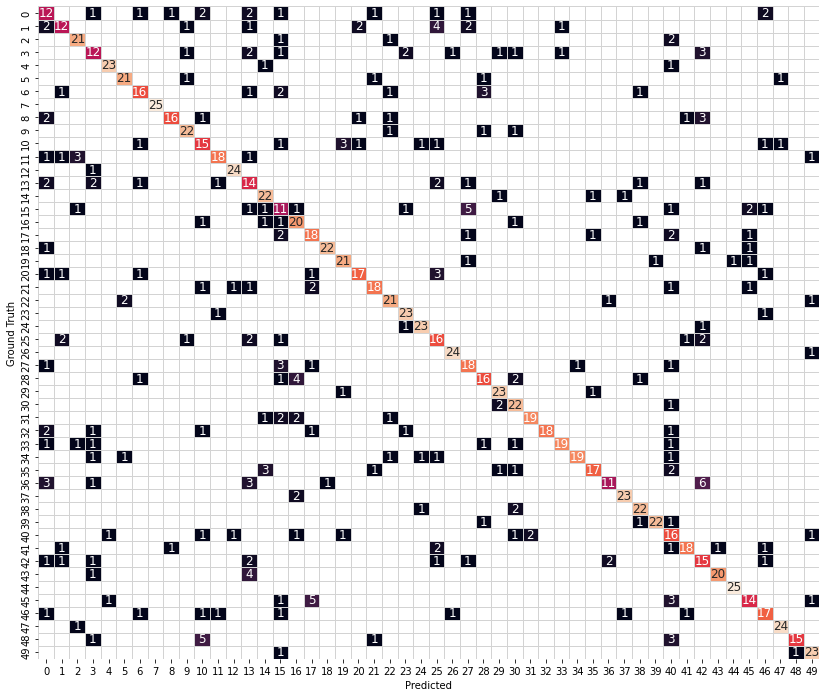

In [8]:
import torch
from src.predictor import predictor_test
from src.helpers import plot_confusion_matrix

model_reloaded = torch.jit.load("checkpoints/transfer_exported.pt")
pred, truth = predictor_test(data_loaders['test'], model_reloaded)
plot_confusion_matrix(pred, truth)